In [ ]:
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.3 MB 6.6 MB/s 


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from tqdm.auto import tqdm
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np

In [ ]:
STOPWORDS = set(nltk.corpus.stopwords.words("english") + ["says", "us", "said" ,"new", "optout", "stop", "ask", "stay", "talk","communityrepli", "free","activ", "agenc"])
PORTER_STEMMER = PorterStemmer()

In [ ]:
def clean_tweets(x):
    # Lowercase
    sentence = x.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub('http[s]?://\S+', '', sentence)
    sentence = re.sub(r'([^a-zA-Z ]+?)', '', sentence)
    #print(sentence)
    #sentence = sentence.replace('\n', '')
    # Remove URLs
    
    #print(sentence)
    # Remove double spacing
    #sentence = re.sub('\s+', ' ', sentence)
    tokenized_tweet = [word for word in word_tokenize(sentence) if word not in STOPWORDS]
    tokenized_tweet = [PORTER_STEMMER.stem(word) for word in tokenized_tweet]
    return tokenized_tweet

In [ ]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#Reuters_Health

In [ ]:
reuters = pd.read_csv('/content/drive/MyDrive/Project 2/data/Reuters_Health.csv')

In [ ]:
len(reuters)

5415

In [ ]:
reuters.iloc[0]['tweet']

'Analysis: Governments want COVID vaccine developers to aim higher in hunt for better shots https://t.co/smwFEp8guz'

In [ ]:
tqdm.pandas()
reuters["tokenized_tweet"] = reuters["tweet"].progress_apply(lambda x : clean_tweets(x))

  0%|          | 0/5415 [00:00<?, ?it/s]

In [ ]:
tokenized_tweets = reuters["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, max_len=4, use_colnames=True)

In [ ]:
len(frequent_itemsets)

103

In [ ]:
print(frequent_itemsets)

      support                    itemsets
0    0.050231                       (amp)
1    0.074054                    (approv)
2    0.064451                    (author)
3    0.073315                   (booster)
4    0.110803                      (case)
..        ...                         ...
98   0.060757        (inc, vaccin, covid)
99   0.078486   (omicron, variant, covid)
100  0.058910       (shot, vaccin, covid)
101  0.052078  (vaccin, wednesday, covid)
102  0.054294      (world, health, organ)

[103 rows x 2 columns]


In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [ ]:
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0         (booster)          (covid)            0.073315            0.613481   
1           (covid)        (booster)            0.613481            0.073315   
2          (vaccin)        (booster)            0.357341            0.073315   
3         (booster)         (vaccin)            0.073315            0.357341   
4         (omicron)     (coronaviru)            0.150139            0.168606   
..              ...              ...                 ...                 ...   
83   (world, organ)         (health)            0.056694            0.214774   
84  (health, organ)          (world)            0.058172            0.089381   
85          (world)  (health, organ)            0.089381            0.058172   
86         (health)   (world, organ)            0.214774            0.056694   
87          (organ)  (world, health)            0.063158            0.063343   

     support  confidence       lift  le

In [ ]:
support=rules['support'].values
confidence=rules['confidence'].values

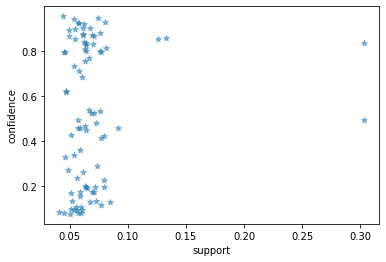

In [ ]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

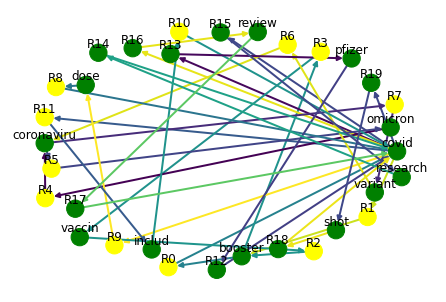

In [ ]:
draw_graph(rules,20)

#WHO

In [ ]:
who = pd.read_csv('/content/drive/MyDrive/Project 2/data/WHO.csv')

In [ ]:
len(who)

4710

In [ ]:
who.iloc[0]['tweet']

'RT @WHO: "If more groups move away from the 70% target, we have more #COVID19 transmission in the 🌍, more people that get sick, more people…'

In [ ]:
tqdm.pandas()
who["tokenized_tweet"] = who["tweet"].progress_apply(lambda x : clean_tweets(x))

  0%|          | 0/4710 [00:00<?, ?it/s]

In [ ]:
tokenized_tweets = who["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, max_len=4, use_colnames=True)

In [ ]:
len(frequent_itemsets)

40

In [ ]:
print(frequent_itemsets)

     support            itemsets
0   0.071125            (access)
1   0.236518               (amp)
2   0.067091              (care)
3   0.157113           (countri)
4   0.295117             (covid)
5   0.060085            (diseas)
6   0.415499           (drtedro)
7   0.050318             (emerg)
8   0.098301            (global)
9   0.270064            (health)
10  0.050955            (includ)
11  0.089597              (live)
12  0.096391              (need)
13  0.097240            (pandem)
14  0.122718             (peopl)
15  0.059023           (prevent)
16  0.055202           (protect)
17  0.051168              (risk)
18  0.201274                (rt)
19  0.085563           (support)
20  0.051805               (use)
21  0.178981            (vaccin)
22  0.064331         (vaccinequ)
23  0.053715              (work)
24  0.055414             (world)
25  0.069427              (year)
26  0.068153        (amp, covid)
27  0.075796      (amp, drtedro)
28  0.077707       (health, amp)
29  0.0556

In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [ ]:
print(rules)

   antecedents consequents  antecedent support  consequent support   support  \
0     (health)       (amp)            0.270064            0.236518  0.077707   
1        (amp)    (health)            0.236518            0.270064  0.077707   
2    (drtedro)   (countri)            0.415499            0.157113  0.084289   
3    (countri)   (drtedro)            0.157113            0.415499  0.084289   
4     (vaccin)   (countri)            0.178981            0.157113  0.055414   
5    (countri)    (vaccin)            0.157113            0.178981  0.055414   
6     (pandem)     (covid)            0.097240            0.295117  0.067304   
7      (covid)    (pandem)            0.295117            0.097240  0.067304   
8     (vaccin)     (covid)            0.178981            0.295117  0.100637   
9      (covid)    (vaccin)            0.295117            0.178981  0.100637   
10    (pandem)   (drtedro)            0.097240            0.415499  0.052017   
11   (drtedro)    (pandem)            0.

In [ ]:
support=rules['support'].values
confidence=rules['confidence'].values

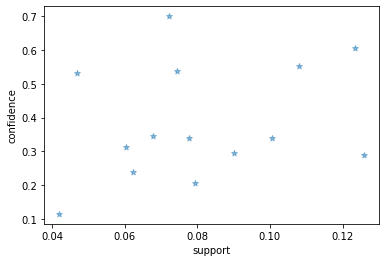

In [ ]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

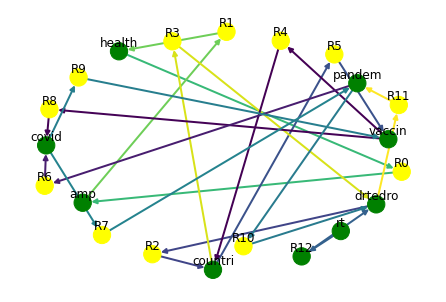

In [ ]:
draw_graph(rules, 13)

#CDC

In [ ]:
cdc = pd.read_csv('/content/drive/MyDrive/Project 2/data/CDCgov.csv')

In [ ]:
tqdm.pandas()
cdc["tokenized_tweet"] = cdc["tweet"].progress_apply(lambda x : clean_tweets(x))

  0%|          | 0/1605 [00:00<?, ?it/s]

In [ ]:
tokenized_tweets = cdc["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, max_len=4, use_colnames=True)

In [ ]:
print(frequent_itemsets)

      support                       itemsets
0    0.089720                          (age)
1    0.221807                          (amp)
2    0.115265                      (booster)
3    0.063551                         (case)
4    0.056075                         (caus)
..        ...                            ...
136  0.067290          (year, vaccin, covid)
137  0.056075         (protect, vaccin, get)
138  0.050467     (year, age, vaccin, covid)
139  0.052960      (vaccin, get, amp, covid)
140  0.054206  (protect, vaccin, get, covid)

[141 rows x 2 columns]


In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [ ]:
print(rules)

      antecedents               consequents  antecedent support  \
0           (age)                   (covid)            0.089720   
1         (covid)                     (age)            0.625545   
2           (age)                  (vaccin)            0.089720   
3        (vaccin)                     (age)            0.422430   
4          (year)                     (age)            0.098442   
..            ...                       ...                 ...   
251  (get, covid)         (protect, vaccin)            0.205607   
252     (protect)      (vaccin, get, covid)            0.155140   
253      (vaccin)     (protect, get, covid)            0.422430   
254         (get)  (protect, vaccin, covid)            0.249221   
255       (covid)    (protect, vaccin, get)            0.625545   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.625545  0.081620    0.909722  1.454287  0.025496    4.147807  
1              0.089720  0.081620  

In [ ]:
support=rules['support'].values
confidence=rules['confidence'].values

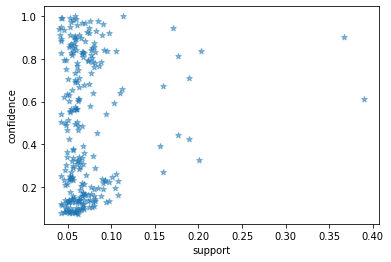

In [ ]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

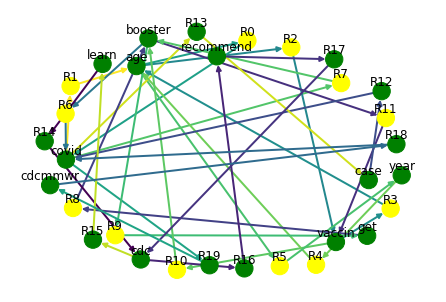

In [ ]:
draw_graph(rules, 20)

#PHAC

In [ ]:
phac = pd.read_csv('/content/drive/MyDrive/Project 2/data/GovCanHealth.csv')

In [ ]:
tqdm.pandas()
phac["tokenized_tweet"] = phac["tweet"].progress_apply(lambda x : clean_tweets(x))

  0%|          | 0/14779 [00:00<?, ?it/s]

In [ ]:
tokenized_tweets = phac["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, max_len=4, use_colnames=True)

In [ ]:
print(frequent_itemsets)

       support                      itemsets
0     0.203735                       (activ)
1     0.130997                 (adultsrepli)
2     0.133297                        (call)
3     0.205630                        (care)
4     0.185398              (communityrepli)
...        ...                           ...
2803  0.130997   (well, train, urgent, text)
2804  0.130997  (train, urgent, youth, text)
2805  0.130997    (well, train, youth, text)
2806  0.130997   (well, youth, urgent, text)
2807  0.130997  (train, youth, urgent, well)

[2808 rows x 2 columns]


In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [ ]:
print(rules)

          antecedents             consequents  antecedent support  \
0              (care)                 (activ)            0.205630   
1             (activ)                  (care)            0.203735   
2            (famili)                 (activ)            0.204276   
3             (activ)                (famili)            0.203735   
4              (help)                 (activ)            0.283916   
...               ...                     ...                 ...   
29879  (well, urgent)          (train, youth)            0.130997   
29880         (train)   (well, youth, urgent)            0.131335   
29881         (youth)   (well, train, urgent)            0.132282   
29882        (urgent)    (well, train, youth)            0.131064   
29883          (well)  (urgent, train, youth)            0.133703   

       consequent support   support  confidence      lift  leverage  \
0                0.203735  0.201773    0.981244  4.816275  0.159879   
1                0.205630  0.

In [ ]:
support=rules['support'].values
confidence=rules['confidence'].values

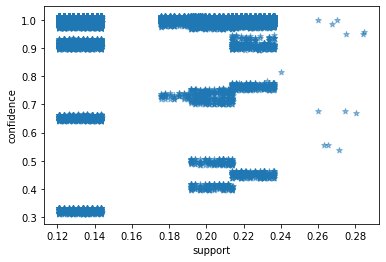

In [ ]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

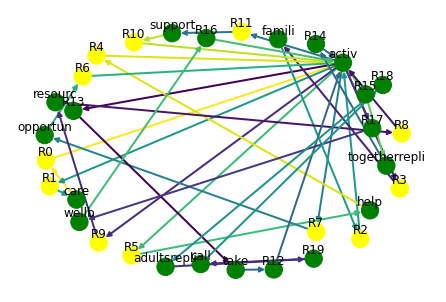

In [ ]:
draw_graph(rules, 20)